
### Diana Barindelli e Veronica Verga, 25 Febbraio 2021


# Esame di Probabilità e Statistica
## Analisi statistica sull'inserimento professionale dei dottorati di ricerca conseguiti negli anni 2012-14


#### Introduzione al notebook

In questo notebook abbiamo effettuato un'indagine sull'inserimento professionale dei dottori di ricerca. In particolare ci siamo soffermate sui dottori che hanno deciso di emigrare all'estero, valutando l'impatto di diversi fattori, quali, ad esempio, il voto di laurea, l'ambito disciplinare e l'area geografica dell'ateneo.

Il notebook è organizzato come segue:

### Indice:

- 1. Caricamento delle tabelle e selezione dei dati;
- 2. analisi qualitativa dei dati;
- 3. analisi della matrice di correlazione;
- 4. stima puntuale di parametri e test di bontà dei modelli;
- 5. conclusioni.

**NOTA:** per rendere il codice più scorrevole è stato attivato l'oscuramento delle celle. Per renderle visibili occorre cliccare il link seguente:


In [60]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Clicca questo link per mostrare o nascondere le celle contenenti il codice </a>.''')

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as sc

# 1. Caricamento delle tabelle e selezione dei dati

In [62]:
plt.rcParams.update({'font.size': 18})

sns.set_theme(font_scale=1.3, style='whitegrid') 
file = 'INSPROFDOTTRIC_Microdati_2018.xlsx'

### Creazione dataframe 

In [63]:
df_tot = pd.read_excel(file)
df_tot.head(5)

,progr_dott,eta_dott,sesso,cittadinanza,citt_ita,anno_dott,mese_dott,ateneo_reg,ateneo_rip,cod_area_w,...,dipaut_p,aut_p,dip_p,titstu_m,titstugen,cond_m,dipaut_m,aut_m,dip_m,coeff
0,3,4,1,301,0,2014,1,19,5,7,...,,,,1,2,4,1,,6,3.876505e+10
1,6,2,1,100,1,2014,1,12,3,5,...,1,,5,2,2,1,1,,5,1.209988e+10
2,9,3,1,100,1,2012,2,12,3,14,...,1,,5,3,3,1,1,,4,1.808666e+10
3,11,3,1,100,1,2012,4,10,3,9,...,1,,1,3,3,1,1,,2,1.144135e+10
4,13,4,1,100,1,2014,2,7,1,8,...,2,2,,3,3,3,,,,1.336878e+10


## Definisco alcuni DataFrame personalizzati
### 1.1 DataFrame generico

Costruiamo un DataFrame, <font color='brown'>[mydf]</font>, contenente: 

- 1. **età conseguimento dottorato** <font color='brown'>[mydf.eta_dottorato]</font>;
- 2. **genere** <font color='brown'>[mydf.sesso]</font>;
- 3. **cittadinanza italiana** <font color='brown'>[mydf.cittadinanza_italiana]</font>;
- 4. **anno conseguimento dottorato** <font color='brown'>[mydf.anno_dottorato]</font>;
- 5. **regione ateneo** <font color='brown'>[mydf.regione_ateneo]</font>:
- 6. **zona ateneo** <font color='brown'>[mydf.zona_ateneo]</font>: l'italia è suddivisa dallo studio dell'ISTAT in cinque fasce: Nord-est, Nord-ovest, Centro, Sud e Isole;
- 7. **ambito del dottorato** <font color='brown'>[mydf.ambito_dottorato]</font>;
- 8. **classe del voto di laurea** <font color='brown'>[mydf.voto_laurea]</font>;
- 9. **titolare di borsa di studio** <font color='brown'>[mydf.borsa_studio]</font>;
- 10. **formazione estera durante il dottorato** <font color='brown'>[mydf.formazione_estera_dottorato]</font>;
- 11. **paese della formazione estera durante il dottorato** <font color='brown'>[mydf.estero_formazione]</font>;
- 12. **periodo estero dalla fine del dottorato** <font color='brown'>[mydf.estero_postdot]</font>;
- 13. **paese del periodo estero dalla fine del dottorato** <font color='brown'>[mydf.paese_estero_postdot]</font>;
- 14. **mesi trascorsi nel paese estero dalla fine del dottorato** <font color='brown'>[mydf.periodo_estero_postdot]</font>;
- 15. **situazione lavorativa** <font color='brown'>[mydf.situazione_lavorativa]</font>;
- 16. **lavora in Italia o all'estero** <font color='brown'>[mydf.lavoro_italia_estero]</font>;
- 17. **zona dell'Italia in cui lavora** <font color='brown'>[mydf.zona_lavoro]</font>;
- 18. **paese estero in cui lavora** <font color='brown'>[mydf.paese_lavoro]</font>;
- 19. **reddito mensile** <font color='brown'>[mydf.reddito_mensile]</font>;
- 20. **condizione nel 2018** <font color='brown'>[mydf.condizione2018]</font>;
- 21. **vive in Italia o all'estero nel 2018** <font color='brown'>[mydf.vive_italia_estero2018]</font>;
- 22. **zona dell'Italia in cui vive nel 2018** <font color='brown'>[mydf.zona_italia2018]</font>;
- 23. **paese estero in cui vive nel 2018** <font color='brown'>[mydf.paese_estero2018]</font>;

In [64]:
mydf =pd.DataFrame()
mydf['eta_dottorato']= df_tot.eta_dott
mydf['sesso']= df_tot.sesso
mydf['cittadinanza_italiana']= df_tot.citt_ita
mydf['anno_dottorato']= df_tot.anno_dott
mydf['regione_ateneo']= df_tot.ateneo_reg
mydf['zona_ateneo']= df_tot.ateneo_rip
mydf['ambito_dottorato']= df_tot.cod_area_w
mydf['voto_laurea']= df_tot.votolau
mydf['borsa_studio']= df_tot.borsa
mydf['formazione_estera_dottorato']= df_tot.estero_d
mydf['estero_formazione']= df_tot.paese_d
mydf['estero_postdot']= df_tot.est_pd
mydf['paese_estero_postdot']= df_tot.postd_p
mydf['periodo_estero_postdot']= df_tot.postd_m
mydf['situazione_lavorativa']= df_tot.lavora
mydf['lavoro_italia_estero']= df_tot.itaest_l
mydf['zona_lavoro']= df_tot.riplav
mydf['paese_lavoro']= df_tot.paeselav
mydf['reddito_mensile']= df_tot.redtot
mydf['condizione2018']= df_tot.cond18
mydf['vive_italia_estero2018']= df_tot.viveita
mydf['zona_italia2018']= df_tot.viverip
mydf['paese_estero2018']= df_tot.vivest

mydf_ita=mydf[mydf["cittadinanza_italiana"]==1]
df_ita=mydf[mydf["cittadinanza_italiana"]==1]

### mydf_ita:

Consideriamo solamente i cittadini italiani e sostituiamo ai codici ISTAT i nomi corrispondenti.

In [65]:
#modifico colonna dell' ambito disciplinare sostituendo ai codici i nomi corrispondenti 
nomi=['Scienze matematiche e informatiche', 'Scienze fisiche', 'Scienze chimiche','Scienze della terra','Scienze biologiche','Scienze mediche','Scienze agraire e veterinarie','Ingegneria civile e Architettuta','Ingegneria industriale e dell informazione','Scienze dell antichità, filologico-letterarie e storiche-artistiche','Scienze storiche,filosofiche, pedagogiche e psicologiche','Scienze giuridiche','Scienze economiche e statistiche','Scienze politiche e sociali','Altro']

mydf_ita.loc[mydf_ita['ambito_dottorato']==1,"ambito_dottorato"]=nomi[0]
mydf_ita.loc[mydf_ita['ambito_dottorato']==2,"ambito_dottorato"]=nomi[1]
mydf_ita.loc[mydf_ita['ambito_dottorato']==3,"ambito_dottorato"]=nomi[2]
mydf_ita.loc[mydf_ita['ambito_dottorato']==4,"ambito_dottorato"]=nomi[3]
mydf_ita.loc[mydf_ita['ambito_dottorato']==5,"ambito_dottorato"]=nomi[4]
mydf_ita.loc[mydf_ita['ambito_dottorato']==6,"ambito_dottorato"]=nomi[5]
mydf_ita.loc[mydf_ita['ambito_dottorato']==7,"ambito_dottorato"]=nomi[6]
mydf_ita.loc[mydf_ita['ambito_dottorato']==8,"ambito_dottorato"]=nomi[7]
mydf_ita.loc[mydf_ita['ambito_dottorato']==9,"ambito_dottorato"]=nomi[8]
mydf_ita.loc[mydf_ita['ambito_dottorato']==10,"ambito_dottorato"]=nomi[9]
mydf_ita.loc[mydf_ita['ambito_dottorato']==11,"ambito_dottorato"]=nomi[10]
mydf_ita.loc[mydf_ita['ambito_dottorato']==12,"ambito_dottorato"]=nomi[11]
mydf_ita.loc[mydf_ita['ambito_dottorato']==13,"ambito_dottorato"]=nomi[12]
mydf_ita.loc[mydf_ita['ambito_dottorato']==14,"ambito_dottorato"]=nomi[13]
mydf_ita.loc[mydf_ita['ambito_dottorato']==15,"ambito_dottorato"]=nomi[14]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [66]:
#modifico colonna dell' area geografica sostituendo ai codici i nomi corrispondenti 
nomi=['Nord-Ovest','Nord-est','Centro','Sud','Isole']

mydf_ita.loc[mydf_ita['zona_ateneo']==1,"zona_ateneo"]=nomi[0]
mydf_ita.loc[mydf_ita['zona_ateneo']==2,"zona_ateneo"]=nomi[1]
mydf_ita.loc[mydf_ita['zona_ateneo']==3,"zona_ateneo"]=nomi[2]
mydf_ita.loc[mydf_ita['zona_ateneo']==4,"zona_ateneo"]=nomi[3]
mydf_ita.loc[mydf_ita['zona_ateneo']==5,"zona_ateneo"]=nomi[4]

In [67]:
#modifico colonna delle regioni degli atenei sostituendo ai codici i nomi 
nomi=['Piemonte','Valle d Aosta','Lombardia','Trentino-Alto Adige','Veneto','Friuli-Venezia Giulia','Liguria','Emilia-Romagna','Toscana','Umbria','Marche','Lazio','Abruzzo','Molise','Campania','Puglia','Basilicata','Calabria','Sicilia','Sardegna']

mydf_ita.loc[mydf_ita['regione_ateneo']==1,"regione_ateneo"]=nomi[0]
mydf_ita.loc[mydf_ita['regione_ateneo']==2,"regione_ateneo"]=nomi[1]
mydf_ita.loc[mydf_ita['regione_ateneo']==3,"regione_ateneo"]=nomi[2]
mydf_ita.loc[mydf_ita['regione_ateneo']==4,"regione_ateneo"]=nomi[3]
mydf_ita.loc[mydf_ita['regione_ateneo']==5,"regione_ateneo"]=nomi[4]
mydf_ita.loc[mydf_ita['regione_ateneo']==6,"regione_ateneo"]=nomi[5]
mydf_ita.loc[mydf_ita['regione_ateneo']==7,"regione_ateneo"]=nomi[6]
mydf_ita.loc[mydf_ita['regione_ateneo']==8,"regione_ateneo"]=nomi[7]
mydf_ita.loc[mydf_ita['regione_ateneo']==9,"regione_ateneo"]=nomi[8]
mydf_ita.loc[mydf_ita['regione_ateneo']==10,"regione_ateneo"]=nomi[9]
mydf_ita.loc[mydf_ita['regione_ateneo']==11,"regione_ateneo"]=nomi[10]
mydf_ita.loc[mydf_ita['regione_ateneo']==12,"regione_ateneo"]=nomi[11]
mydf_ita.loc[mydf_ita['regione_ateneo']==13,"regione_ateneo"]=nomi[12]
mydf_ita.loc[mydf_ita['regione_ateneo']==14,"regione_ateneo"]=nomi[13]
mydf_ita.loc[mydf_ita['regione_ateneo']==15,"regione_ateneo"]=nomi[14]
mydf_ita.loc[mydf_ita['regione_ateneo']==16,"regione_ateneo"]=nomi[15]
mydf_ita.loc[mydf_ita['regione_ateneo']==17,"regione_ateneo"]=nomi[16]
mydf_ita.loc[mydf_ita['regione_ateneo']==18,"regione_ateneo"]=nomi[17]
mydf_ita.loc[mydf_ita['regione_ateneo']==19,"regione_ateneo"]=nomi[18]
mydf_ita.loc[mydf_ita['regione_ateneo']==20,"regione_ateneo"]=nomi[19]

In [68]:
#modifico colonna dei voti di laurea sostituendo ai codici i range corrispondenti 
nomi=['110 e lode','110','da 105 a 109','da 100 a 104','Minore di 100']

mydf_ita.loc[mydf_ita['voto_laurea']==1,"voto_laurea"]=nomi[0]
mydf_ita.loc[mydf_ita['voto_laurea']==2,"voto_laurea"]=nomi[1]
mydf_ita.loc[mydf_ita['voto_laurea']==3,"voto_laurea"]=nomi[2]
mydf_ita.loc[mydf_ita['voto_laurea']==4,"voto_laurea"]=nomi[3]
mydf_ita.loc[mydf_ita['voto_laurea']==5,"voto_laurea"]=nomi[4]

In [69]:
#modifico colonna delle destinazioni sostituendo ai codici i nomi 
#mydf_ita['paese_lavoro'].replace(' ', '100', inplace=True)

nomi=['Italia','Resto Europa','Francia','Germania','Regno Unito','Spagna','Svizzera','Resto del mondo','Stati Uniti','Non definito']

mydf_ita.loc[mydf_ita['paese_lavoro']==100,"paese_lavoro"]=nomi[0]
mydf_ita.loc[mydf_ita['paese_lavoro']==101,"paese_lavoro"]=nomi[1]
mydf_ita.loc[mydf_ita['paese_lavoro']==215,"paese_lavoro"]=nomi[2]
mydf_ita.loc[mydf_ita['paese_lavoro']==216,"paese_lavoro"]=nomi[3]
mydf_ita.loc[mydf_ita['paese_lavoro']==219,"paese_lavoro"]=nomi[4]
mydf_ita.loc[mydf_ita['paese_lavoro']==239,"paese_lavoro"]=nomi[5]
mydf_ita.loc[mydf_ita['paese_lavoro']==241,"paese_lavoro"]=nomi[6]
mydf_ita.loc[mydf_ita['paese_lavoro']==301,"paese_lavoro"]=nomi[7]
mydf_ita.loc[mydf_ita['paese_lavoro']==536,"paese_lavoro"]=nomi[8]
mydf_ita.loc[mydf_ita['paese_lavoro']==998,"paese_lavoro"]=nomi[9]

In [70]:
#modifico colonna dei sessi sostituendo ai codici i nomi 
nomi=['Maschi','Femmine']

mydf_ita.loc[mydf_ita['sesso']==1,"sesso"]=nomi[0]
mydf_ita.loc[mydf_ita['sesso']==2,"sesso"]=nomi[1]

In [71]:
mydf_ita.head(5)

,eta_dottorato,sesso,cittadinanza_italiana,anno_dottorato,regione_ateneo,zona_ateneo,ambito_dottorato,voto_laurea,borsa_studio,formazione_estera_dottorato,...,periodo_estero_postdot,situazione_lavorativa,lavoro_italia_estero,zona_lavoro,paese_lavoro,reddito_mensile,condizione2018,vive_italia_estero2018,zona_italia2018,paese_estero2018
1,2,Maschi,1,2014,Lazio,Centro,Scienze biologiche,110 e lode,1,4,...,99,1,2,9,Stati Uniti,2600,1,2,9,536
2,3,Maschi,1,2012,Lazio,Centro,Scienze politiche e sociali,110 e lode,3,3,...,3,2,1,3,,2300,1,1,3,
3,3,Maschi,1,2012,Umbria,Centro,Ingegneria industriale e dell informazione,da 105 a 109,1,3,...,,1,1,3,,2000,2,1,3,
4,4,Maschi,1,2014,Liguria,Nord-Ovest,Ingegneria civile e Architettuta,Minore di 100,3,4,...,,2,1,1,,1000,1,1,1,
5,2,Maschi,1,2012,Toscana,Centro,Ingegneria industriale e dell informazione,110,1,2,...,,1,1,3,,2050,2,1,3,


### mydf_estero:

Consideriamo i dottori italiani che lavorano all'estero.

In [72]:
mydf_estero=mydf_ita[mydf_ita["lavoro_italia_estero"]==2]

In [73]:
mydf_estero.head(5)

,eta_dottorato,sesso,cittadinanza_italiana,anno_dottorato,regione_ateneo,zona_ateneo,ambito_dottorato,voto_laurea,borsa_studio,formazione_estera_dottorato,...,periodo_estero_postdot,situazione_lavorativa,lavoro_italia_estero,zona_lavoro,paese_lavoro,reddito_mensile,condizione2018,vive_italia_estero2018,zona_italia2018,paese_estero2018
1,2,Maschi,1,2014,Lazio,Centro,Scienze biologiche,110 e lode,1,4,...,99,1,2,9,Stati Uniti,2600,1,2,9,536
6,2,Femmine,1,2012,Lazio,Centro,"Scienze dell antichità, filologico-letterarie ...",110 e lode,1,2,...,99,1,2,9,Regno Unito,1800,2,2,9,219
14,4,Maschi,1,2012,Toscana,Centro,Scienze economiche e statistiche,da 100 a 104,2,2,...,99,1,2,9,Resto Europa,1150,2,2,9,101
18,3,Maschi,1,2014,Lombardia,Nord-Ovest,Scienze mediche,110 e lode,2,4,...,99,1,2,9,Stati Uniti,2800,2,2,9,536
19,1,Maschi,1,2012,Friuli-Venezia Giulia,Nord-est,Scienze fisiche,110 e lode,1,4,...,26,1,2,9,Germania,1600,2,2,9,216


In [74]:
#elimino le righe vuote

mydf_ita['lavoro_italia_estero'].replace('     ', np.nan, inplace=True)
mydf_ita=mydf_ita.dropna()
mydf_estero['lavoro_italia_estero'].replace('     ', np.nan, inplace=True)
mydf_estero=mydf_estero.dropna()

mydf_ita['regione_ateneo'].replace(' ', np.nan, inplace=True)
mydf_ita=mydf_ita.dropna()
mydf_estero['regione_ateneo'].replace(' ', np.nan, inplace=True)
mydf_estero=mydf_estero.dropna()

mydf_ita['zona_ateneo'].replace(' ', np.nan, inplace=True)
mydf_ita=mydf_ita.dropna()
mydf_estero['zona_ateneo'].replace(' ', np.nan, inplace=True)
mydf_estero=mydf_estero.dropna()

#modifico mydf_ita in modo da avere un conteggio di quante persone siano in Italia o all'estero in base all'ambito disciplinare

z_ita=(mydf_ita['ambito_dottorato'].unique())

data_ita=pd.DataFrame(index=z_ita)

for i in data_ita.index:
    data_ita.at[i, 'Lavora in Italia o all estero'] = len(mydf_ita[(mydf_ita['ambito_dottorato']==i)])
    data_ita.at[i, 'Lavora all estero'] = len(mydf_estero[(mydf_estero['ambito_dottorato']==i)])    
    data_ita.at[i, 'Lavora in Italia o all estero normalizzato'] = len(mydf_ita[(mydf_ita['ambito_dottorato']==i)])/len(mydf_ita[(mydf_ita['ambito_dottorato']==i)])
    data_ita.at[i, 'Lavora all estero normalizzato'] = len(mydf_estero[(mydf_estero['ambito_dottorato']==i)])/len(mydf_ita[(mydf_ita['ambito_dottorato']==i)])

Creiamo dei contatori

In [75]:
data_ita

,Lavora in Italia o all estero,Lavora all estero,Lavora in Italia o all estero normalizzato,Lavora all estero normalizzato
Scienze biologiche,1522.0,210.0,1.0,0.137976
Scienze politiche e sociali,539.0,67.0,1.0,0.124304
Ingegneria industriale e dell informazione,1801.0,341.0,1.0,0.189339
Ingegneria civile e Architettuta,1169.0,129.0,1.0,0.110351
"Scienze dell antichità, filologico-letterarie e storiche-artistiche",1500.0,136.0,1.0,0.090667
Scienze fisiche,672.0,221.0,1.0,0.328869
Scienze della terra,375.0,38.0,1.0,0.101333
"Scienze storiche,filosofiche, pedagogiche e psicologiche",1360.0,135.0,1.0,0.099265
Scienze economiche e statistiche,805.0,111.0,1.0,0.137888
Scienze mediche,2389.0,224.0,1.0,0.093763


In [76]:
#modifico mydf_ita in modo da avere un conteggio di quante persone siano in Italia o all'estero in base alla regione dell'ateneo

z2_ita=(mydf_ita['regione_ateneo'].unique())

data_ita2=pd.DataFrame(index=z2_ita)

for i in data_ita2.index:   
    data_ita2.at[i, 'Lavora in Italia o all estero'] = len(mydf_ita[(mydf_ita['regione_ateneo']==i)])
    data_ita2.at[i, 'Lavora all estero'] = len(mydf_estero[(mydf_estero['regione_ateneo']==i)])

In [77]:
data_ita2

,Lavora in Italia o all estero,Lavora all estero
Lazio,2340.0,286.0
Umbria,252.0,33.0
Liguria,349.0,48.0
Toscana,1456.0,203.0
Lombardia,2313.0,386.0
Friuli-Venezia Giulia,435.0,105.0
Emilia-Romagna,1263.0,186.0
Piemonte,861.0,137.0
Sicilia,1140.0,81.0
Marche,417.0,41.0


In [78]:
mydf_soloita=mydf_ita[mydf_ita["lavoro_italia_estero"]==1]

z3_ita=(mydf_ita['voto_laurea'].unique())


data_ita3=pd.DataFrame(index=z3_ita)

for i in data_ita3.index:   
    data_ita3.at[i, 'Lavora in Italia'] = len(mydf_soloita[(mydf_soloita['voto_laurea']==i)]) 
    data_ita3.at[i, 'Lavora all estero'] = len(mydf_estero[(mydf_estero['voto_laurea']==i)])
    data_ita3.at[i, 'Lavora all estero o in Italia'] = len(mydf_ita[(mydf_ita['voto_laurea']==i)])

In [79]:
data_ita3=data_ita3.sort_values('Lavora in Italia',ascending=False)

In [80]:
data_ita3

,Lavora in Italia,Lavora all estero,Lavora all estero o in Italia
110 e lode,8030.0,1447.0,10050.0
da 105 a 109,1780.0,211.0,2104.0
110,1225.0,187.0,1482.0
da 100 a 104,962.0,89.0,1140.0
Minore di 100,513.0,60.0,631.0


### 1.2 DataFrame futuro

Abbiamo inoltre deciso di costruire un altro DataFrame, in cui consideriamo le intenzioni future dei dottorri italiani concentrandoci su coloro che hanno dichiarato di voler emigrare e sulle loro motivazioni.

Il DataFrame **mydf_future** <font color='brown'>[mydf_future]</font>, contiene dati in merito a:

- 1. cittadinanza italiana  <font color='brown'>[mydf_future.cittadinanza_italiana]</font>;
- 2. pensa di lasciare l'Italia?  <font color='brown'>[mydf_future.emigrare]</font>;
- 3. stato estero in cui pensa di emigrare <font color='brown'>[mydf_future.paese]</font>;
- 4. lasciare l'Italia: occasione di studio e formazione <font color='brown'>[mydf_future.motivo_studio]</font>.
- 5. lasciare l'Italia: precedenti esperienze <font color='brown'>[mydf_future.motivo_esperienza]</font>.
- 6. lasciare l'Italia: più opportunità di lavoro <font color='brown'>[mydf_future.motivo_piu_lavoro]</font>.
- 7. lasciare l'Italia: lavoro più qualificato <font color='brown'>[mydf_future.motivo_qualifica_lavoro]</font>.
- 8. lasciare l'Italia: lavoro più retributio <font color='brown'>[mydf_future.motivo_retribuzione_lavoro]</font>.
- 9. lasciare l'Italia: paese più all'avanguardia <font color='brown'>[mydf_future.motivo_avanguardia_paese]</font>.
- 10. lasciare l'Italia: accordi bilaterali <font color='brown'>[mydf_future.motivo_accordi_bilaterali]</font>.
- 11. lasciare l'Italia: motivi familiari e personali <font color='brown'>[mydf_future.motivo_familiare]</font>.

Il DataFrame **future**, <font color='brown'>[future]</font>, è stato ricavato a partire da mydf_future tenendo in considerazione i soli motivi della decisione di emigrare.


### mydf_future:

In [81]:
mydf_future =pd.DataFrame()
mydf_future['cittadinanza_italiana']= df_tot.citt_ita
mydf_future['emigrare']= df_tot.fuga
mydf_future['paese']= df_tot.fuga_p
mydf_future['motivo_studio']= df_tot.fugastu
mydf_future['motivo_esperienza']= df_tot.fugaesp
mydf_future['motivo_piu_lavoro']= df_tot.fugalav
mydf_future['motivo_qualifica_lavoro']= df_tot.fugaqual
mydf_future['motivo_retribuzione_lavoro']= df_tot.fugared
mydf_future['motivo_avanguardia_paese']= df_tot.fugav
mydf_future['motivo_accordi_bilaterali']= df_tot.fugaccor
mydf_future['motivo_familiare']= df_tot.fugafam

mydf_ita_future=mydf_future[mydf_future["cittadinanza_italiana"]==1]

mydf_ita_future['emigrare'].replace(' ', np.nan, inplace=True)
mydf_ita_future=mydf_ita_future.dropna()

mydf_ita_future['paese'].replace('   ', np.nan, inplace=True)
mydf_ita_future=mydf_ita_future.dropna()

future=pd.DataFrame()
future['Motivo_di_studio']= mydf_ita_future.motivo_studio
future['Per_esperienza']= mydf_ita_future.motivo_esperienza
future['Piu_lavoro']= mydf_ita_future.motivo_piu_lavoro
future['Qualifica_di_lavoro']= mydf_ita_future.motivo_qualifica_lavoro
future['Migliore_retribuzione']= mydf_ita_future.motivo_retribuzione_lavoro
future['Maggiore_avanguardia_del_paese']= mydf_ita_future.motivo_avanguardia_paese
future['Accordi_bilaterali_paesi']= mydf_ita_future.motivo_accordi_bilaterali
future['Motivi_familiari']= mydf_ita_future.motivo_familiare

In [82]:
mydf_future.head(5)

,cittadinanza_italiana,emigrare,paese,motivo_studio,motivo_esperienza,motivo_piu_lavoro,motivo_qualifica_lavoro,motivo_retribuzione_lavoro,motivo_avanguardia_paese,motivo_accordi_bilaterali,motivo_familiare
0,0,,,,,,,,,,
1,1,,,,,,,,,,
2,1,2,536,2,3,2,2,2,2,2,4
3,1,3,,,,,,,,,
4,1,1,536,1,3,1,1,1,1,4,2


### future:

In [83]:
future.head(5)

,Motivo_di_studio,Per_esperienza,Piu_lavoro,Qualifica_di_lavoro,Migliore_retribuzione,Maggiore_avanguardia_del_paese,Accordi_bilaterali_paesi,Motivi_familiari
2,2,3,2,2,2,2,2,4
4,1,3,1,1,1,1,4,2
5,3,3,3,1,1,1,3,4
43,2,1,1,1,2,2,4,4
47,4,4,4,4,4,4,4,1


# 2. Analisi qualitativa dei dati

Dal punto di vista qualitativo abbiamo voluto mettere a confronto i dottori totali con i dottori che sono emigrati e che attualmente lavorano all'estero in funzione di diversi fattori: 

- (i) mettendo a confronto il numero dei dottori per gruppo disciplinare, evidenziando coloro che sono emigrati e lavorano all'estero ed in quali ambiti compare una maggiore discrepanza (**Figura 1**); 
- (ii) visualizzando la differenza dei dottorati in base alla zona geografica dell'ateneo e confrontando quanti tra questi hanno deciso di emigrare. Per quanto riguarda l'ananlisi delle macro-zone d'Italia, abbiamo deciso di prendere anche in considerazione il genere (**Figura 2**);
- (iii) analizzando i grafici dei voti di laurea, abbiamo cercato se ci fosse una maggiore tendenza ad emigrare all'estero per determinate classi (**Figura 3**);
- (iv) rappresentando sulla mappa geografica la distribuzione nel mondo dei dottori che lavorano, evidenziando anche le differenze di reddito medio mensile (**Figura 4**);
- (v) considerando coloro che si trovano in Italia e hanno dichiarato di voler emigrare, soffermandoci sui motivi della loro scelta (**Figura 5**);


### 2.1 Confronto emigrati all'estero rispetto ai dottorati totali in funzione dell'ambito disciplinare

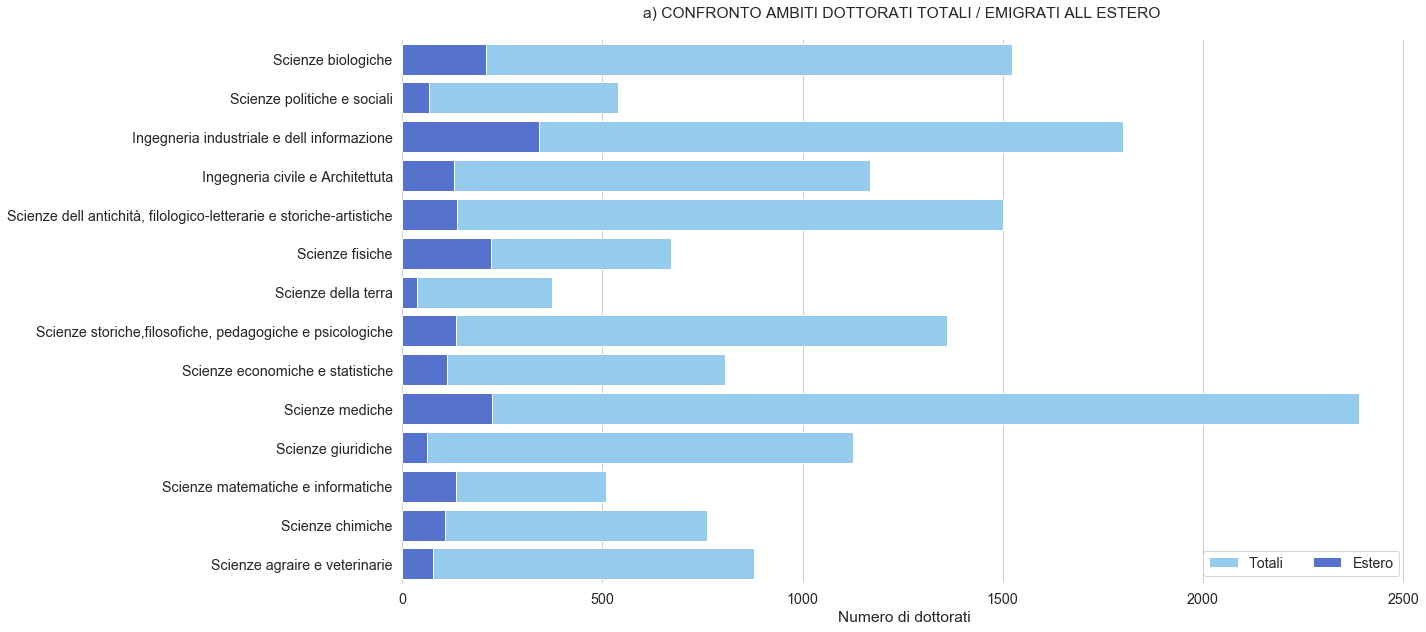

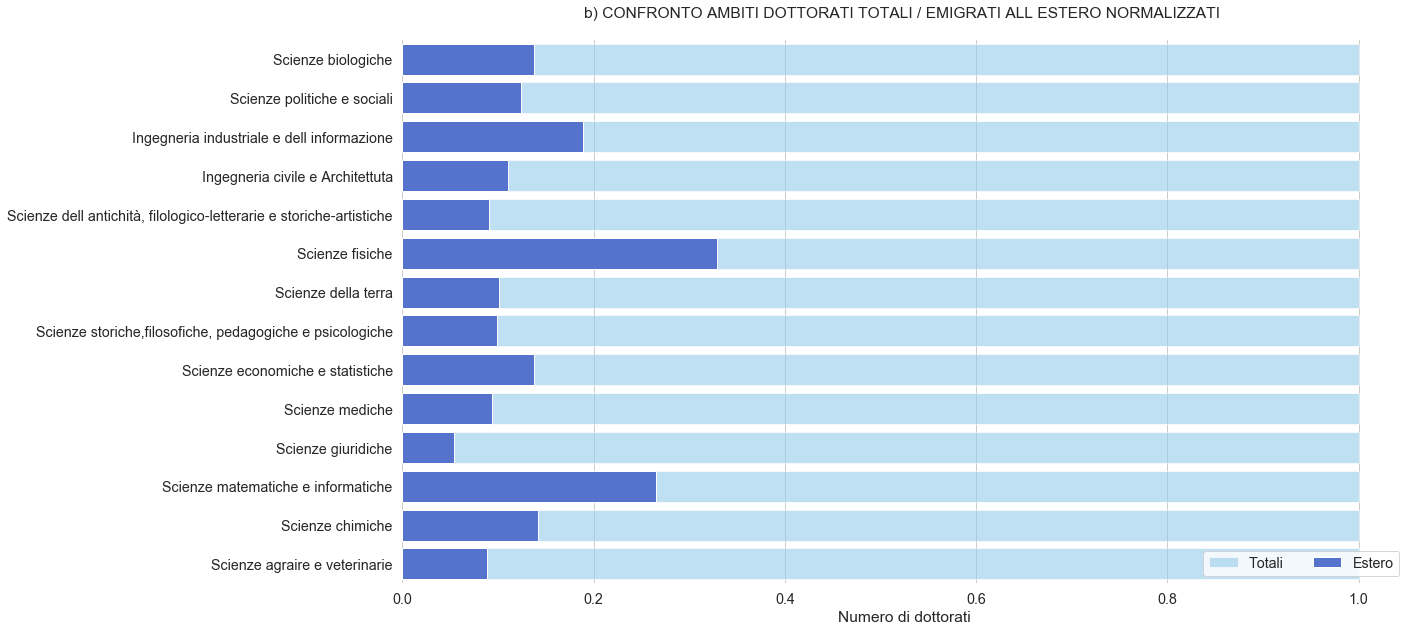

In [84]:
plt.rcParams.update({'font.size': 18})

f, ax = plt.subplots(figsize=(18, 10))
ax.title.set_text('a) CONFRONTO AMBITI DOTTORATI TOTALI / EMIGRATI ALL ESTERO \n')


sns.barplot(y=data_ita.index, x='Lavora in Italia o all estero', data = data_ita,
            label="Totali", color="lightskyblue")


sns.barplot(y=data_ita.index, x='Lavora all estero', data = data_ita,
            label="Estero", color="royalblue")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="",
       xlabel="Numero di dottorati")
sns.despine(left=True, bottom=True)

f, ax = plt.subplots(figsize=(18, 10))
ax.title.set_text('b) CONFRONTO AMBITI DOTTORATI TOTALI / EMIGRATI ALL ESTERO NORMALIZZATI \n')


sns.barplot(y=data_ita.index, x='Lavora in Italia o all estero normalizzato', data = data_ita,
            label="Totali", color="lightskyblue", alpha=0.6)


sns.barplot(y=data_ita.index, x='Lavora all estero normalizzato', data = data_ita,
            label="Estero", color="royalblue")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="",
       xlabel="Numero di dottorati")
sns.despine(left=True, bottom=True)

**Figura 1(a):** ciascuna barra orizzontale rappresenta in colore scuro e chiaro rispettivamente il numero di dottori che lavorano all'estero e il numero totale di dottori, suddivisi per l'ambito di conseguimento del dottorato. Possiamo notare un elevato numero di dottori in ambito medico e in ambito ingegneristico e dell'informazione con dei consistenti numeri di dottori che sono all'estero. Tuttavia come già possiamo osservare da questo primo grafico, sarà decisamente più interessante andare a valutare i valori normalizzati per i singoli ambiti in modo tale da avere il peso dei dottori che fuggono all'estero per ogni categoria.

**Figura 1(b):** in questo grafico ogni barra è normalizzata e il colore scuro rappresenta la percentuale di dottori per ogni ambito che, dopo aver conseguito un dottorato presso un ateneo italiano, è andata a lavorare all'estero. Possiamo notare che, seppur i dottori che appartengono all'ambito di ingegneria industriale e dell'informazione all'estero siano una notevole percentuale, in realtà sono principalmente i dottori in scienze fisiche (oltre il 30%) e scienze matematiche e informatiche (oltre il 20%) che tendono ad emigrare. Inoltre si nota che per tutti gli altri ambiti le percentuali di dottori all'estero, seppur minori, sono sempre abbastanza considerevoli.

### 2.2 Confronto emigrati all'estero rispetto ai dottorati totali in funzione dell'area geografica dell'ateneo

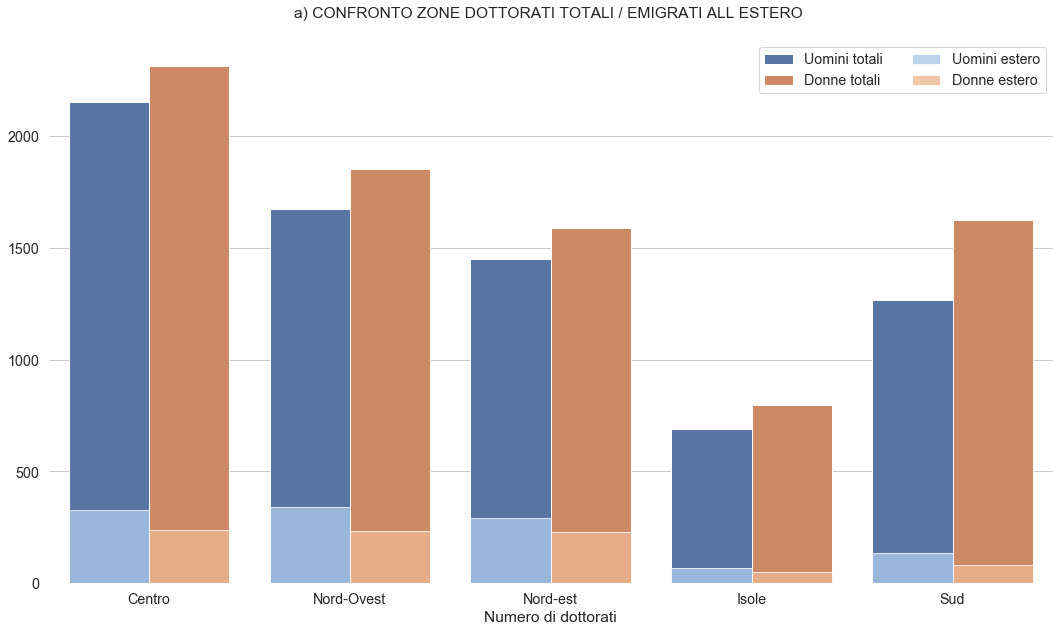

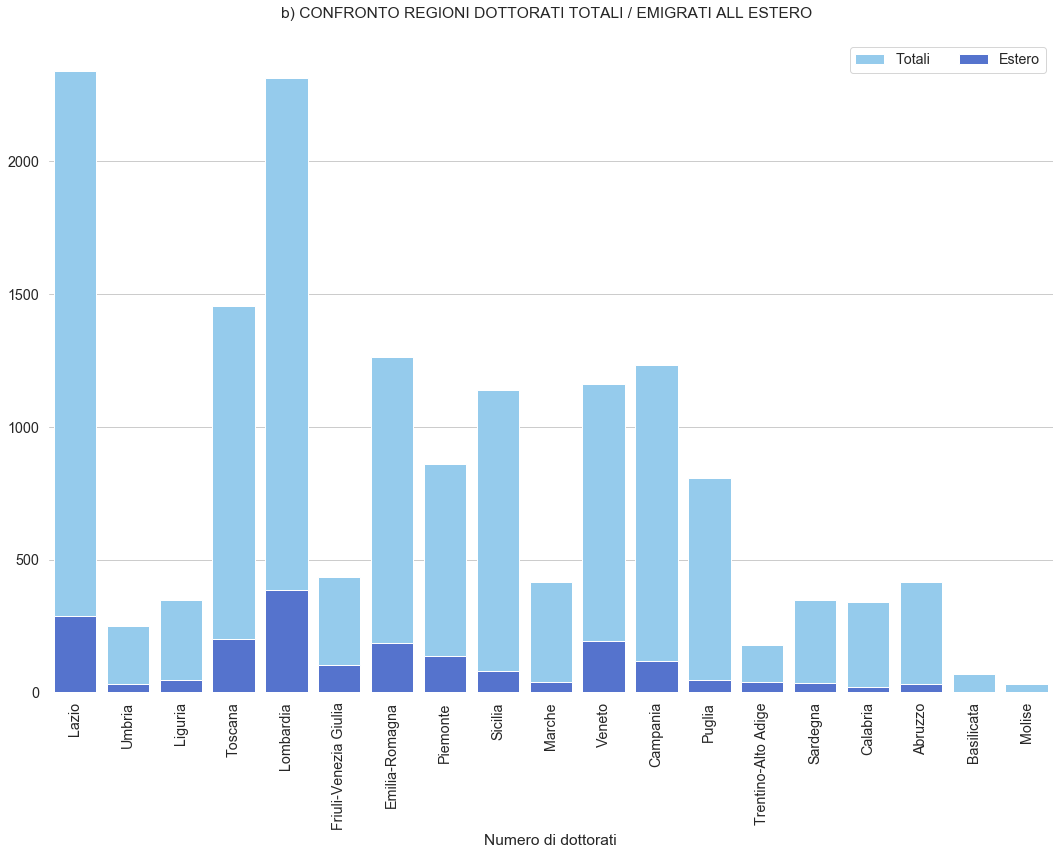

In [85]:
plt.rcParams.update({'font.size': 18})

f, ax = plt.subplots(figsize=(18, 10))
ax.title.set_text('a) CONFRONTO ZONE DOTTORATI TOTALI / EMIGRATI ALL ESTERO \n')


sns.countplot(x=mydf_ita.zona_ateneo, hue=mydf_ita.sesso , data = mydf_ita) 
sns.color_palette()

sns.countplot(x=mydf_estero.zona_ateneo, hue=mydf_estero.sesso, data = mydf_estero,
            palette="pastel", alpha=0.8)

#ax.legend(ncol=2, loc="upper right", frameon=True)
plt.legend(ncol=2, loc='upper right', labels=['Uomini totali','Donne totali','Uomini estero','Donne estero'])
ax.set( ylabel="",
       xlabel="Numero di dottorati")
sns.despine(left=True, bottom=True)

f, ax = plt.subplots(figsize=(18, 12))
ax.title.set_text('b) CONFRONTO REGIONI DOTTORATI TOTALI / EMIGRATI ALL ESTERO  \n')



sns.barplot(y='Lavora in Italia o all estero', x=data_ita2.index, data = data_ita2,
            label="Totali", color="lightskyblue")

sns.barplot(y='Lavora all estero', x=data_ita2.index, data = data_ita2,
            label="Estero", color="royalblue")

plt.xticks(rotation=90)
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set( ylabel="",
       xlabel="Numero di dottorati")
sns.despine(left=True, bottom=True)

**Figura 2(a):** ogni colonna rappresenta il valore assoluto di dottori, suddivisi per genere, che hanno conseguito un dottorato in un ateneo che appartiene alle diverse zone d'Italia tra Centro, Nord-Ovest, Nord-Est, Isole e Sud. Come si può osservare il numero maggiore di dottori proviene da atenei situati nel Nord Italia. Tuttavia, il dato più interessante che emerge da questo grafico è che, nonostante le donne costituiscano per ogni zona il numero maggiore di dottori, in realtà sono gli uomini che tendono ad emigrare maggiormente con discrepanze ben evidenti in ogni fascia.

**Figura 2(b)** per ogni colonna il colore più chiaro rappresenta il valore assoluto di dottori suddivisi per regione di appartenenza dell'ateneo, mentre il colore più scuro rappresenta i dottori che sono emigrati a lavorare all'estero. In particolare, come ci aspettavamo, osserviamo che il maggior numero di dottori proviene da atenei situati nel Lazio e in Lombardia e, analogamente, l'andamento dei dottori all'estero non presenta particolari correlazioni con le regioni di provenienza ma tendenzialmente segue l'andamento dei numeri totali regionali.

### 2.3 Confronto emigrati all'estero rispetto ai dottorati totali in funzione del voto di laurea

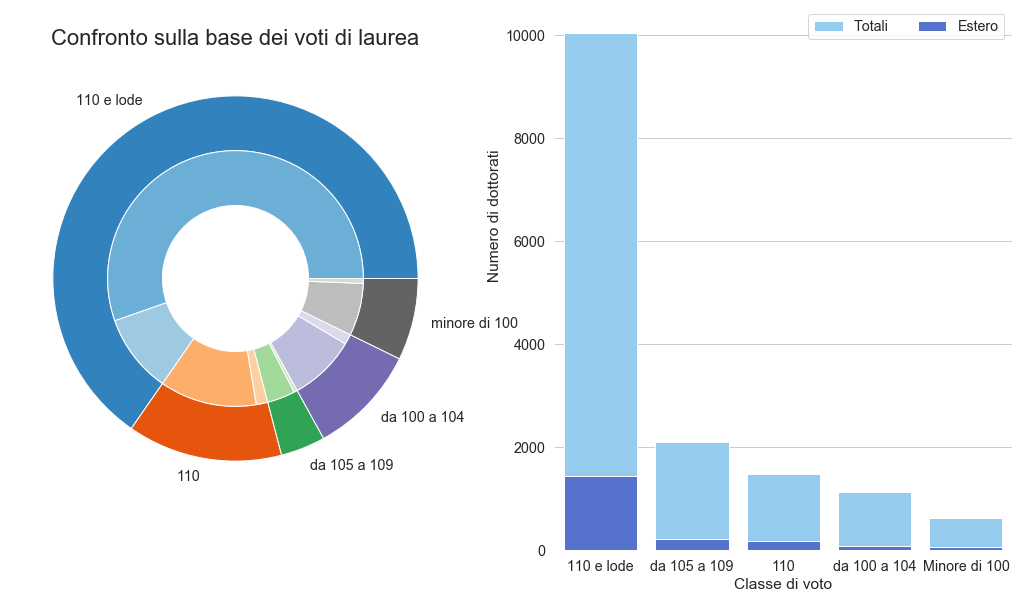

In [86]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,10))


size = 0.3
vals = np.array([[8030., 1447.], [1780., 211.], [513., 60.], [1225., 187.], [962., 89.]])
labels= '110 e lode', '110','da 105 a 109','da 100 a 104', 'minore di 100'

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(5)*4)
inner_colors = cmap(np.array([1, 2, 6, 7, 10, 11, 14, 15, 18, 19]))

ax1.pie(vals.sum(axis=1), radius=1, colors=outer_colors, labels=labels, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax1.pie(vals.flatten(), radius=1-size, colors=inner_colors, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax1.set(aspect="equal")
ax1.set_title('Confronto sulla base dei voti di laurea', fontsize=22)




sns.barplot(y='Lavora all estero o in Italia', x=data_ita3.index, data = data_ita3,
            label="Totali", color="lightskyblue")

sns.barplot(y='Lavora all estero', x=data_ita3.index, data = data_ita3,
            label="Estero", color="royalblue")


ax2.legend(ncol=2, loc="upper right", frameon=True)
ax2.set( ylabel="                             Numero di dottorati",
       xlabel="Classe di voto")
sns.despine(left=True, bottom=True)


plt.show()

**Figura 3:** Nel grafico a sinistra viene rappresentata la suddivisione in percentuale dei dottori in funzione della classe del voto di laurea, evidenziando nella corona circolare interna la differenza tra i dottori in Italia (tonalità più scura) e all'estero (tonalità più chiara). Si può osservare che la percentuale maggiore di dottori si è laureata con 110 e lode e si può calcolare che c'è una maggiore tendenza ad emigrare in coloro che hanno ottenuto una votazione più alta, seppur le discrepanze non siano considerevoli. Nel barplot di destra, invece, sono mostrati i valori assoluti dei dottori suddivisi per classe di voto. L'andamento rispecchia quello emerso dal grafico a torta.

### 2.4 Confronto dottori nel mondo e redditi mensili

In [87]:
import geoplot
import geopandas
import pyproj

In [88]:
mydf_ita['reddito_mensile'].replace('    ', np.nan, inplace=True)
mydf_ita=mydf_ita.dropna()
mydf_soloita['reddito_mensile'].replace('    ', np.nan, inplace=True)
mydf_soloita=mydf_soloita.dropna()


mydf_paese=pd.DataFrame({'paese_lavoro': list(mydf_ita.paese_lavoro), 'reddito_mensile': list(mydf_ita.reddito_mensile)})
mydf_paese.head(10)

mydf_soloitar=pd.DataFrame({'reddito_mensile': list(mydf_soloita.reddito_mensile)})

In [89]:
N=len(mydf_paese['paese_lavoro'])


In [90]:
italia, resto_europa, francia, germania, regno_unito, spagna, svizzera, resto_mondo, stati_uniti, non_def = 0,0,0,0,0,0,0,0,0,0
r_europa=[]
r_francia=[]
r_regno_unito=[]
r_spagna=[]
r_svizzera=[]
r_resto_mondo=[]
r_stati_uniti=[]
r_non_def=[]
r_germania=[]

for i in range(0,N):
    if(mydf_paese.paese_lavoro[i]=='Resto Europa'):
        resto_europa=resto_europa+1
        r_europa.append(mydf_paese.reddito_mensile[i])
    if(mydf_paese.paese_lavoro[i]=='Francia'):
        francia=francia+1
        r_francia.append(mydf_paese.reddito_mensile[i])
    if(mydf_paese.paese_lavoro[i]=='Regno Unito'):
        regno_unito=regno_unito+1
        r_regno_unito.append(mydf_paese.reddito_mensile[i])
    if(mydf_paese.paese_lavoro[i]=='Spagna'):
        spagna=spagna+1
        r_spagna.append(mydf_paese.reddito_mensile[i])
    if(mydf_paese.paese_lavoro[i]=='Svizzera'):
        svizzera=svizzera+1
        r_svizzera.append(mydf_paese.reddito_mensile[i])
    if(mydf_paese.paese_lavoro[i]=='Resto del Mondo'):
        resto_mondo=resto_mondo+1
        r_resto_mondo.append(mydf_paese.reddito_mensile[i])
    if(mydf_paese.paese_lavoro[i]=='Stati Uniti'):
        stati_uniti=stati_uniti+1
        r_stati_uniti.append(mydf_paese.reddito_mensile[i])
    if(mydf_paese.paese_lavoro[i]=='Non definito'):
        non_def=non_def+1
        r_non_def.append(mydf_paese.reddito_mensile[i])
    if(mydf_paese.paese_lavoro[i]=='Germania'):
        germania=germania+1
        r_germania.append(mydf_paese.reddito_mensile[i])
    
    

In [91]:
r_italia=[]
M= len(mydf_soloitar)
for i in range(0,M):
    r_italia.append(mydf_soloitar.reddito_mensile[i])
    

In [92]:
medie_redditi=[np.mean(r_europa),np.mean(r_francia),np.mean(r_regno_unito),np.mean(r_spagna),np.mean(r_svizzera),np.mean(r_resto_mondo),np.mean(r_stati_uniti),np.mean(r_non_def),np.mean(r_germania)]

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [93]:
media_italia=np.mean(r_italia)

In [94]:
#print(italia, resto_europa, francia, germania, regno_unito, spagna, svizzera, resto_mondo, stati_uniti, non_def)
#print(medie_redditi)
#print(media_italia)

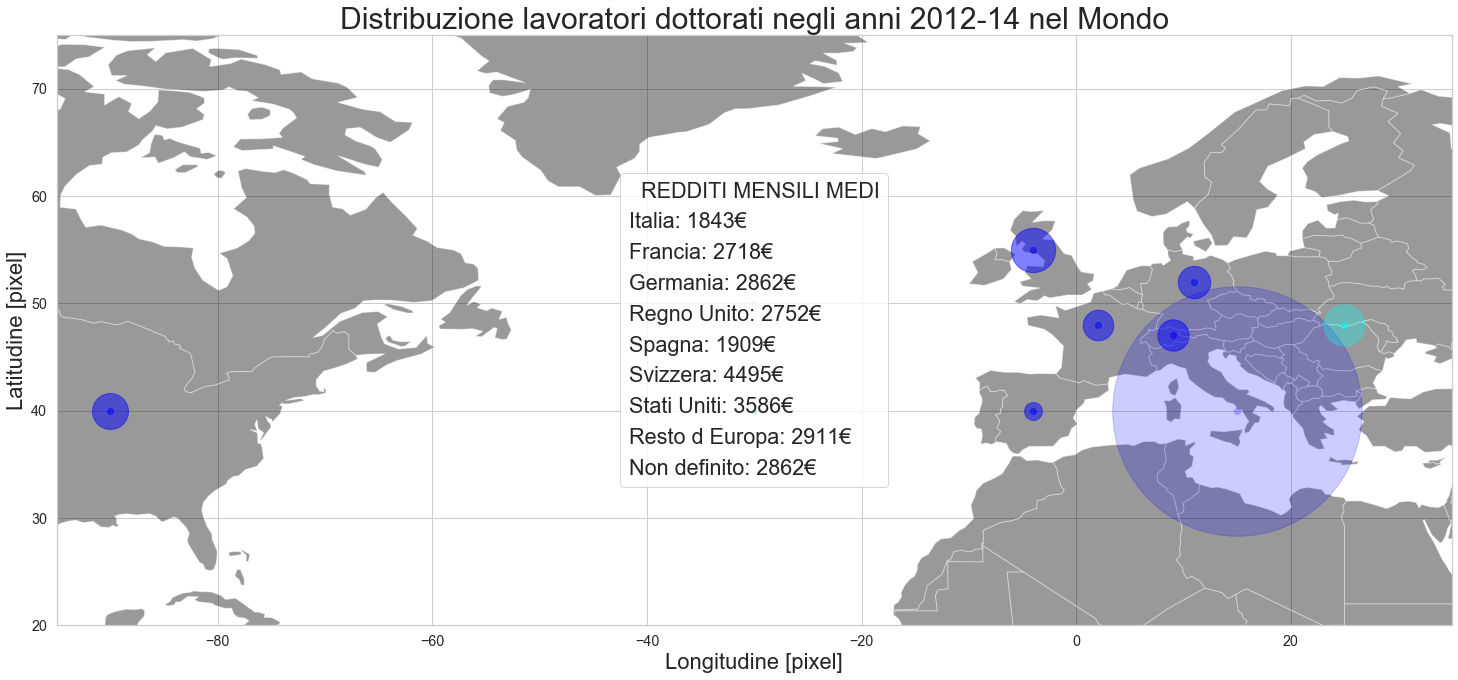

In [95]:
world= geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax= world.plot(figsize=(25,25), color='black', alpha=0.4)
ax.set_xlim([-95,35])
ax.set_ylim([20,75])
plt.title('Distribuzione lavoratori dottorati negli anni 2012-14 nel Mondo', fontsize=30)
plt.scatter(-30,50, alpha=0.5, color='y')
plt.scatter(-30,50, s=resto_mondo, alpha=0.5, color='y', label='  REDDITI MENSILI MEDI')
plt.scatter(15,40, alpha=0.2, color='blue')
plt.scatter(15,40, s=12454*5, alpha=0.2, color='blue', label='Italia: 1843€')
plt.scatter(2,48, alpha=0.5, color='blue')
plt.scatter(2,48, s=francia*5, alpha=0.5, color='blue', label='Francia: 2718€')
plt.scatter(11,52, alpha=0.5, color='blue')
plt.scatter(11,52, s=germania*5, alpha=0.5, color='blue',label='Germania: 2862€')
plt.scatter(-4,55, alpha=0.5, color='blue')
plt.scatter(-4,55, s=regno_unito*5, alpha=0.5, color='blue',label='Regno Unito: 2752€')
plt.scatter(-4,40, alpha=0.5, color='blue')
plt.scatter(-4,40, s=spagna*5, alpha=0.5, color='blue',label='Spagna: 1909€')
plt.scatter(9,47, alpha=0.5, color='blue')
plt.scatter(9,47, s=svizzera*5, alpha=0.5, color='blue',label='Svizzera: 4495€')
plt.scatter(-90,40, alpha=0.5, color='blue')
plt.scatter(-90,40, s=stati_uniti*5, alpha=0.5, color='blue',label='Stati Uniti: 3586€')
plt.scatter(25,48, alpha=0.5, color='aqua')
plt.scatter(25,48, s=resto_europa*5, alpha=0.3, color='aqua',label='Resto d Europa: 2911€')
plt.scatter(-30,40, alpha=0.3, color='green')
plt.scatter(-30,40, s=non_def*5, alpha=0.5, color='green', label='Non definito: 2862€')
plt.xlabel('Longitudine [pixel]', fontsize=22)
plt.ylabel('Latitudine [pixel]',fontsize=22)
leg = ax.legend(handlelength=0, handletextpad=0, fancybox=True, loc='center', fontsize='large')
for item in leg.legendHandles:
    item.set_visible(False)
plt.show()

**Figura 4:** sulla cartina geografica è riportata la distribuzione dei lavoratori tramite gli indicatori a cerchio, pesati sul numero dei lavoratori, e centrati sul paese interessato. Si osserva che, come ci aspettavamo, la gran parte dei dottorati è rimasta in Italia mentre la restante è emigrata principalmente in Gran Bretagna, seguita dal resto d'Europa (indicata in azzurro) e negli Stati Uniti. Sono stati inoltre riportati i redditi medi mensili per ciascun paese, dai quali si evince che l'Italia è il paese col più basso reddito mensile; al contrario, Svizzera e Stati Uniti sono quelli ad avere il reddito maggiore, che potrebbe essere dovuto anche ad un costo della vita più elevato.

### 2.5 Motivazioni della scelta di emigrare all'estero

[Text(0, 0.5, 'Importanza (1: molto importante  -  4: poco importante)'),
 Text(0.5, 0, "Motivi di fuga all'estero")]

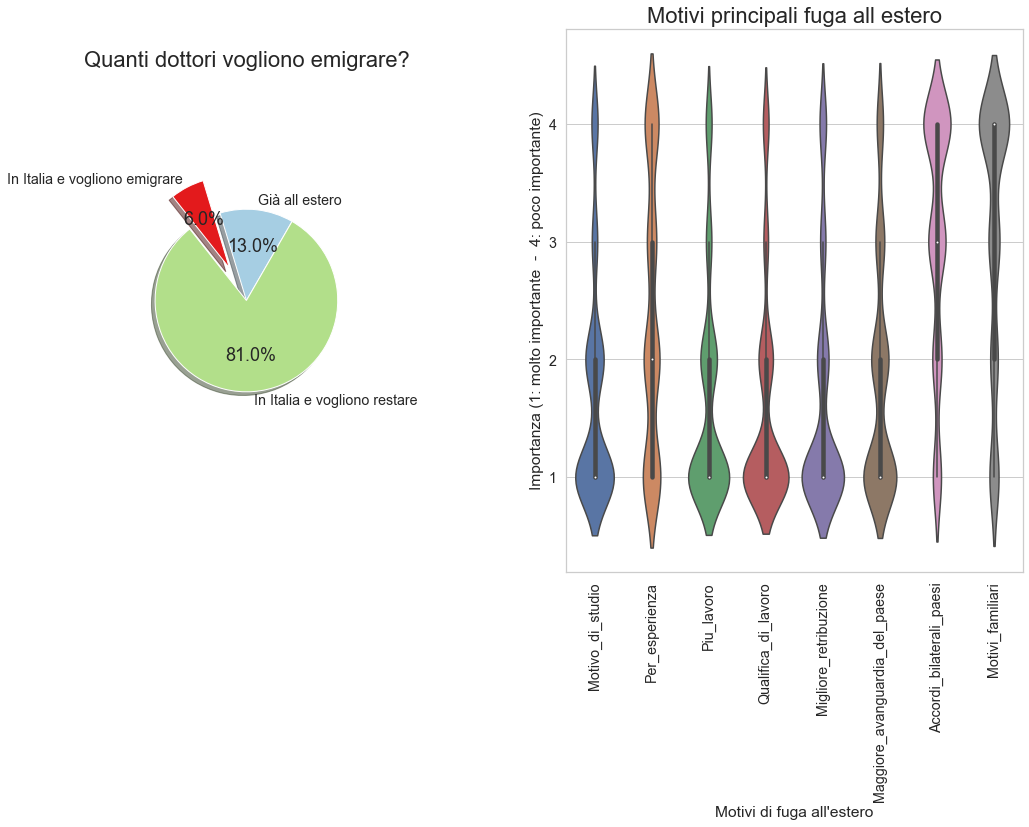

In [96]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,10))




labels= 'Già all estero', 'In Italia e vogliono emigrare', 'In Italia e vogliono restare'
sizes= np.array([13, 6, 81])
explode=(0,0.2,0)
cmap = plt.get_cmap("Paired")
col=cmap(np.array([0,5,2]))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=60, radius=0.5,colors=col)
ax1.set_title('Quanti dottori vogliono emigrare?', fontsize=22)
#ax1.axis('equal')




future['Motivo_di_studio']=pd.to_numeric(future['Motivo_di_studio'],errors='coerce')
future['Per_esperienza']=pd.to_numeric(future['Per_esperienza'],errors='coerce')
future['Piu_lavoro']=pd.to_numeric(future['Piu_lavoro'],errors='coerce')
future['Qualifica_di_lavoro']=pd.to_numeric(future['Qualifica_di_lavoro'],errors='coerce')
future['Migliore_retribuzione']=pd.to_numeric(future['Migliore_retribuzione'],errors='coerce')
future['Maggiore_avanguardia_del_paese']=pd.to_numeric(future['Maggiore_avanguardia_del_paese'],errors='coerce')
future['Accordi_bilaterali_paesi']=pd.to_numeric(future['Accordi_bilaterali_paesi'],errors='coerce')
future['Motivi_familiari']=pd.to_numeric(future['Motivi_familiari'],errors='coerce')

fut = future.melt(var_name='groups', value_name='vals')

ax2 = sns.violinplot(x="groups", y="vals", data=fut)
plt.xticks(rotation=90)
ax2.set_title('Motivi principali fuga all estero', fontsize=22)
ax2.set( ylabel="Importanza (1: molto importante  -  4: poco importante)",
       xlabel="Motivi di fuga all'estero")





**Figura 5:** in questa ultima parte dell'analisi qualitativa, ci siamo concentrate sui motivi che spingono i dottori a decidere di emigrare all'estero. Nel grafico a torta viene rappresento il campione dei dottori attualmente in Italia e che vuole emigrare in confronto a coloro che sono già all'estero e a quelli che invece rimarranno in Italia. Si vede che il nostro campione pur essendo la fetta più piccola della popolazione, rappresenta una percentuale non trascurabile sul totale dei dottori. Su di essi è stato eseguito un violinplot, a destra, che riporta i motivi della scelta di emigrare con la relativa importanza. Come ci aspettavamo, prevalgono le motivazioni dovute alla qualifica e alla maggiore disponibilità di lavoro, alla migliore retribuzione e ai motivi di studio. Ad essi segue, in ordine di importanza decrescente, l'avanguardia maggiore del paese estero.

# 3. Analisi della matrice di correlazione

Per svolgere l'analisi di correlazione abbiamo deciso di visualizzare la clustermap relativa alle colonne di nostro interesse del DataFrame **[mydf_ita]**, (**Figura 6**).

In [97]:
df_ita['lavoro_italia_estero'].replace('     ', np.nan, inplace=True)
df_ita=df_ita.dropna()

df_ita['regione_ateneo'].replace(' ', np.nan, inplace=True)
df_ita=df_ita.dropna()

df_ita['zona_ateneo'].replace(' ', np.nan, inplace=True)
df_ita=df_ita.dropna()

df_ita['reddito_mensile'].replace('    ', np.nan, inplace=True)
df_ita=df_ita.dropna()

df_ita['paese_lavoro']=pd.to_numeric(df_ita['paese_lavoro'],errors='coerce')
#df_ita['paese_lavoro'].replace(np.nan, '100', inplace=True)
df_ita['paese_lavoro'].fillna(100, inplace=True)

#df_ita.paese_lavoro

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [98]:
df_ita['lavoro_italia_estero']=pd.to_numeric(df_ita['lavoro_italia_estero'],errors='coerce')

In [99]:
mydf_corr =pd.DataFrame()

mydf_corr['eta_dottorato']= df_ita.eta_dottorato
mydf_corr['sesso']= df_ita.sesso
#mydf_corr['regione_ateneo']= df_ita.regione_ateneo
mydf_corr['zona_ateneo']= df_ita.zona_ateneo
mydf_corr['ambito_dottorato']= df_ita.ambito_dottorato
mydf_corr['voto_laurea']= df_ita.voto_laurea
mydf_corr['borsa_studio']= df_ita.borsa_studio
mydf_corr['formazione_estera_dottorato']= df_ita.formazione_estera_dottorato
mydf_corr['estero_postdot']= df_ita.estero_postdot
mydf_corr['lavoro_italia_estero']= df_ita.lavoro_italia_estero
mydf_corr['paese_lavoro']= df_ita.paese_lavoro
mydf_corr['reddito_mensile']= df_ita.reddito_mensile
#mydf_corr['condizione2018']= df_ita.condizione2018
#mydf_corr['vive_italia_estero2018']= df_ita.vive_italia_estero2018


In [100]:
#df_ita.head(10)

In [101]:
#mydf_corr.head(20)

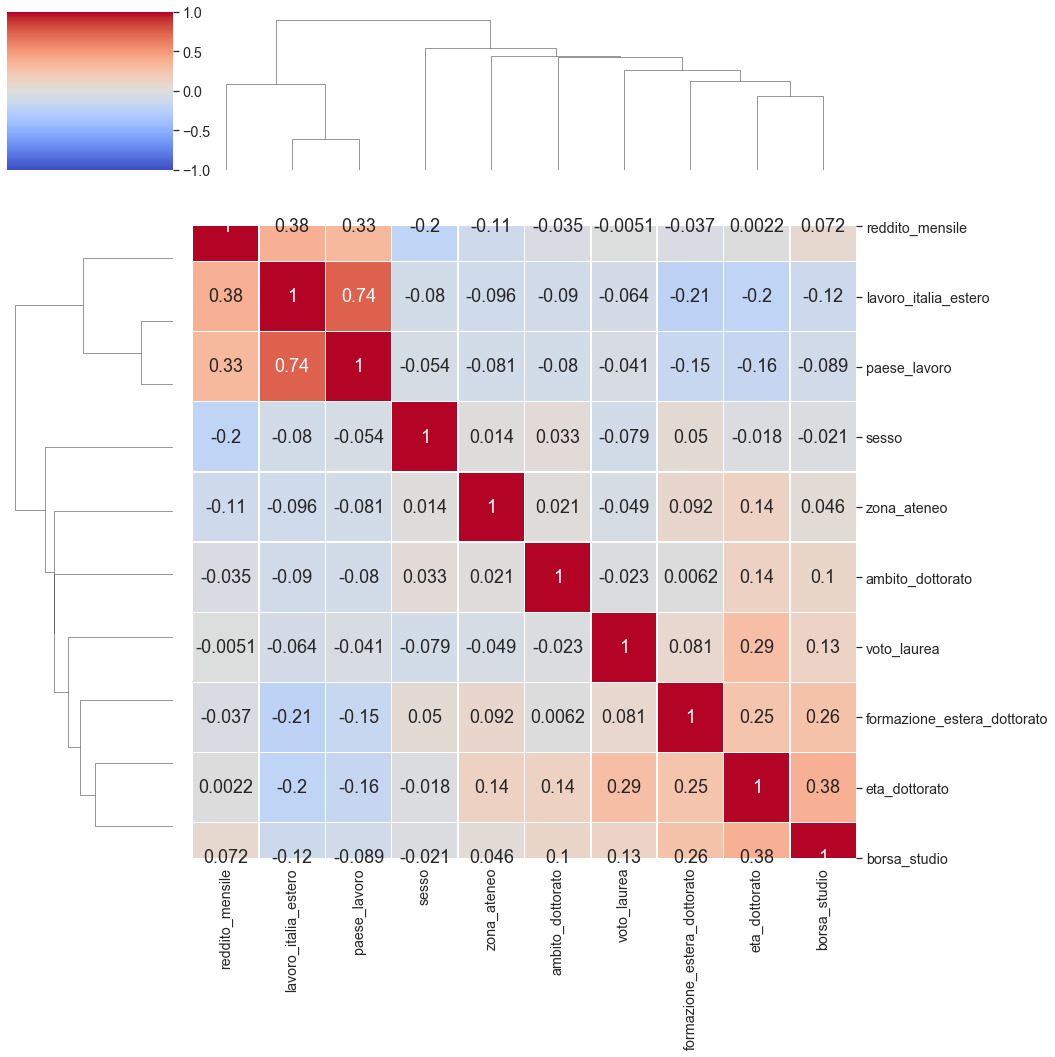

In [102]:
sns.clustermap(mydf_corr.corr(), annot=True, figsize=(15,15), vmin=-1, vmax=+1, cmap='coolwarm', linewidth=.4)

plt.tight_layout()
plt.show()

**Figura 6:** la clustermap rappresenta la matrice di correlazione dei dati utilizzati.

Sono evidenti due raggruppamenti nella correlazione delle variabili: il primo blocco in alto, ben evidente in rosso, corrisponde ai dati reppresentativi dei dottori che lavorano all'estero. In questo gruppo si registra una chiara correlazione positiva tra le variabili reddito - lavoro in Italia o all'estero e reddito - paese in cui si lavora, proprio come ci aspettavamo.

Inoltre, seppur deboli, si registrano anticorrelazioni tra genere e reddito mensile. Tuttavia ci saremmo aspettate correlazione tra genere e la scelta di emigrare, specchio delle considerazioni fatte per la **Figura 2(a)**, ma ciò non emerge dalla clustermap. Infine, si può notare anche una debole anticorrelazione sia tra coloro che hanno fatto formazione all'estero nel corso del loro dottorato sia tra l'età a cui è stato conseguito il dottorato con la decisione di lavorare in Italia o all'estero.

In aggiunta, non si individuano correlazioni evidenti tra l'ambito di specializzazione e la scelta di emigrare all'estero, come invece invece era emerso dall'analisi preliminare, dovuto al fatto che i dati sono riportati seguendo le classi assegnate dall'ISTAT . Allo stesso modo non è possibilie osservare correlazioni tra i voti di laurea e il paese di lavoro.

Si nota inoltre un secondo blocco in basso sulla destra che indica correlazione positiva per quanto riguarda le variabili relative all'età, all'ottenimento di borse di studio durante il dottorato, alla formazione estera durante il dottorato e al voto di laurea. Possiamo affermare che queste correlazioni fossero prevedibili ma che tuttavia non siano significative per il tipo di analisi che abbiamo deciso di effettuare in quanto il nostro scopo era di verificare la correlazione tra queste variabili e la decisione dei dottori di lavorare in Italia o all'estero.

# 4. Stima puntuale di parametri e test di bontà dei fit

L'idea sviluppata nella prossima parte del notebook è la seguente: volendo ulteriormente analizzare le differenze in merito al reddito medio mensile in funzione del paese in cui lavorano i dottori, abbiamo deciso di effettuare un fit di Maximum-Likelihood utilizzando una distribuzione Cauchy per i dati relativi ai dottori che hanno dichiarato di lavorare in Italia e per quelli che invece hanno dichiarato di lavorare all'estero in modo tale da poter avere un confronto diretto. (**Figura 7(a)**)

Infine, volendoci concentrare nel nostro studio sui dottori che hanno scelto di trasferirsi a lavorare all'estero abbiamo studiato nel dettaglio l'istogramma riguardante i dati esteri, effettuando un fit di Maximum-Likelihood anche con le distribuzioni di Gauss e Laplace per poi confrontarle (**Figura 7(b) e 7(c)**).

## 4.1) Stime di maximum-likelihood

### Cauchy fit sui due campioni relativi all'Italia e all'estero


In [103]:
df_ita['reddito_mensile']=pd.to_numeric(df_ita['reddito_mensile'],errors='coerce')

df_soloita=df_ita[df_ita["lavoro_italia_estero"]==1]
df_estero=df_ita[df_ita["lavoro_italia_estero"]==2]


In [104]:
zz = np.linspace(0,7500, 10000)                                             # linspace per rappresentare le pdf

estero_fit_c = sc.cauchy.fit(df_estero.reddito_mensile)         #ML Cauchy estero
italia_fit_c = sc.cauchy.fit(df_soloita.reddito_mensile)                    # MLE Laplace italia
                     
italia_pdf_c = sc.cauchy.pdf(zz, italia_fit_c[0], italia_fit_c[1])      # pdf Laplace italia
estero_pdf_c = sc.cauchy.pdf(zz, estero_fit_c[0], estero_fit_c[1])



print('                                                                                                       ')
print('*******************************************************************************************************')
print('**                     MLE CAUCHY A CONFRONTO PER ESTERO/ITALIA                                   **')
print('*******************************************************************************************************')
print('                                                                                                       ')
print('STIMATORI DI ML PER MODELLO CAUCHY E CAMPIONE ESTERO   :', estero_fit_c)   
print('STIMATORI DI ML PER MODELLO CAUCHY E CAMPIONE ITALIA :', italia_fit_c)

                                                                                                       
*******************************************************************************************************
**                     MLE CAUCHY A CONFRONTO PER ESTERO/ITALIA                                   **
*******************************************************************************************************
                                                                                                       
STIMATORI DI ML PER MODELLO CAUCHY E CAMPIONE ESTERO   : (2672.103135980851, 630.9545235334017)
STIMATORI DI ML PER MODELLO CAUCHY E CAMPIONE ITALIA : (1627.755707742926, 317.79906808309204)


### Fit di ML del campione relativo alla fascia: Italia e estero; Gaussiana, Cauchy e Laplace a confronto

In [105]:
estero_fit = sc.norm.fit(df_estero.reddito_mensile)                          # MLE Gauss estero
estero_fit_l = sc.laplace.fit(df_estero.reddito_mensile)                     # MLE Laplace estero
estero_fit_c = sc.cauchy.fit(df_estero.reddito_mensile)                      # MLE Cauchy estero

estero_pdf = sc.norm.pdf(zz, estero_fit[0],estero_fit[1])                            # pdf Gauss estero
estero_pdf_l = sc.laplace.pdf(zz, estero_fit_l[0],estero_fit_l[1])                   # pdf Laplace estero
estero_pdf_c = sc.cauchy.pdf(zz, estero_fit_c[0], estero_fit_c[1])                   # pdf Cauchy estero


estero_cdf = sc.norm.cdf(zz, estero_fit[0],estero_fit[1])                            # cdf Gauss estero
estero_cdf_l = sc.laplace.cdf(zz, estero_fit_l[0],estero_fit_l[1])                   # cdf Laplace estero
estero_cdf_c = sc.cauchy.cdf(zz, estero_fit_c[0], estero_fit_c[1])                   # cdf Cauchy estero


print('                                                                                                       ')
print('*******************************************************************************************************')
print('**                MLE GAUSS, LAPLACE E CAUCHY ESTERO                                      **')
print('*******************************************************************************************************')
print('                                                                                                       ')

print('STIMATORI DI ML PER MODELLO GAUSS E CAMPIONE ESTERO    :', estero_fit)   
print('STIMATORI DI ML PER MODELLO LAPLACE E CAMPIONE ESTERO  :', estero_fit_l)
print('STIMATORI DI ML PER MODELLO CAUCHY E CAMPIONE ESTERO   :', estero_fit_c)

                                                                                                       
*******************************************************************************************************
**                MLE GAUSS, LAPLACE E CAUCHY ESTERO                                      **
*******************************************************************************************************
                                                                                                       
STIMATORI DI ML PER MODELLO GAUSS E CAMPIONE ESTERO    : (3047.5974372664177, 1390.720176731012)
STIMATORI DI ML PER MODELLO LAPLACE E CAMPIONE ESTERO  : (2750.0000000000214, 1010.3576944176201)
STIMATORI DI ML PER MODELLO CAUCHY E CAMPIONE ESTERO   : (2672.103135980851, 630.9545235334017)


### Rappresentazione grafica dei Fit 

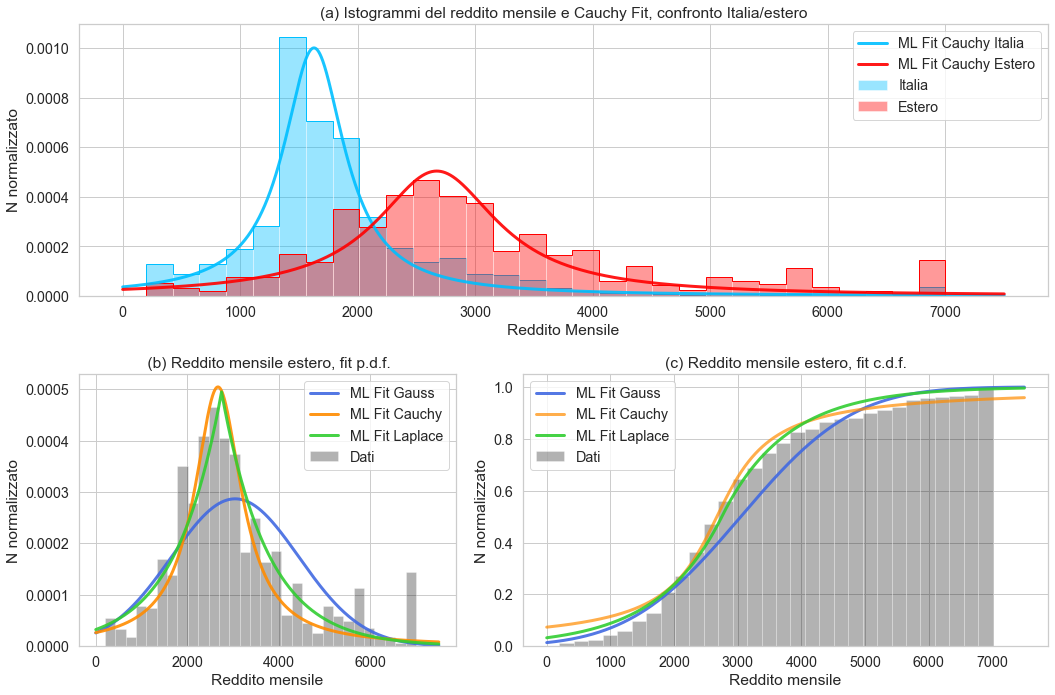

In [106]:
plt.figure(figsize=(15,10))

plt.subplot(2,7,(1,7))
plt.title("(a) Istogrammi del reddito mensile e Cauchy Fit, confronto Italia/estero")
plt.hist(df_soloita.reddito_mensile, bins=30, alpha=0.4, density=True, color='deepskyblue', label='Italia')
plt.hist(df_soloita.reddito_mensile, bins=30, alpha=1, histtype='step', linewidth=1, density=True, color='deepskyblue')
plt.plot(zz, italia_pdf_c, label='ML Fit Cauchy Italia', color='deepskyblue', linewidth=3, alpha=0.9)

plt.hist(df_estero.reddito_mensile, bins=30, alpha=0.4, density=True, color='red', label='Estero')
plt.hist(df_estero.reddito_mensile, bins=30, alpha=1, histtype='step', linewidth=1, density=True, color='red')
plt.plot(zz, estero_pdf_c, label='ML Fit Cauchy Estero', color='red', linewidth=3, alpha=0.9)


plt.xlabel('Reddito Mensile')
plt.ylabel('N normalizzato')


plt.legend()
plt.subplot(2,7,(8,10))
plt.title(' (b) Reddito mensile estero, fit p.d.f.')
plt.hist(df_estero.reddito_mensile, bins=30, alpha=0.3, density=True, color='black', label='Dati')
plt.plot(zz, estero_pdf, label='ML Fit Gauss', color='royalblue', linewidth=3, alpha=0.9)
plt.plot(zz, estero_pdf_c, label='ML Fit Cauchy', color='darkorange', linewidth=3, alpha=0.9)
plt.plot(zz, estero_pdf_l, label='ML Fit Laplace', color='limegreen', linewidth=3, alpha=0.9)


plt.xlabel('Reddito mensile')
plt.ylabel('N normalizzato')
plt.legend()


plt.subplot(2,7,(11,14))
plt.title('(c) Reddito mensile estero, fit c.d.f.')
plt.hist(df_estero.reddito_mensile, bins=30, alpha=0.3, density=True, color='black', cumulative=True, label='Dati')
plt.plot(zz, estero_cdf, label='ML Fit Gauss', color='royalblue', linewidth=3, alpha=0.9)
plt.plot(zz, estero_cdf_c, label='ML Fit Cauchy', color='darkorange', linewidth=3, alpha=0.7)
plt.plot(zz, estero_cdf_l, label='ML Fit Laplace', color='limegreen', linewidth=3, alpha=0.9)

plt.ylabel('N normalizzato')
plt.xlabel('Reddito mensile')

plt.legend()

plt.tight_layout()


plt.show()

**Figura 7(a):** sono rappresentati i due istogrammi normalizzati dei dati relativi al reddito mensile medio suddivisi tra Italia ed estero. Per ciascun campione abbiamo effettuato un fit di maximum-likelihood avendo fissato come modello la distribuzione di Cauchy. Già graficamente è evidente che per l'Italia la distribuzione dei redditi è piccata attorno ad un valore di circa €1600 al mese con code basse, che diventano trascurabili per valori maggiori di €3500 circa. Al contrario per l'estero i redditi sono distribuiti in modo più omogeneo, con un picco meno evidente attorno a circa €2800 e con code consistenti. Risulta, quindi, evidente la differenza tra le distribuzioni dei redditi mensili: la curva riferita all'estero è più spostata verso valori più alti, con importanti outliers anche a valori molto elevati (attorno a €7000).

**Figura 7(b):** rappresentazione dell'istogramma normalizzato dei dati relativi al reddito mensile medio per i dottori che lavorano all'estero, su cui sono sovrapposte le p.d.f. ottenute tramite fit di maximum-likelihood avendo fissato come modello una distribuzione di Gauss, una distribuzione di Cauchy e una distribuzione di Laplace.

**Figura 7(c):** rappresentazione dell'istogramma cumulato normalizzato dei dati relativi al reddito mensile medio per i dottori che lavorano all'estero, su cui sono sovrapposte le c.d.f. ottenute tramite fit di maximum-likelihood avendo fissato come modello una distribuzione di Gauss, una distribuzione di Cauchy e una distribuzione di Laplace.


Osservando i fit in Figura 7.a, per quanto riguarda l'Italia la Cauchy non sembra rispecchiare bene l'andamento dei dati in quanto l'istogramma appare abbastanza asimmetrico e perciò ci aspettiamo, una volta effettuato il test di Kolmogorov-Smirnov, dei valori per i p-value piuttosto bassi. Invece per il fit dell'estero la Cauchy approssima abbastanza bene l'andamento dell'istogramma e quindi ci aspettiamo dei valori per i p-value maggiori di quelli dell'Italia.

Osservando i fit in Figura 7.b, la curva che sembra approssimare meglio i dati e la Laplace, per la quale ci aspettiamo i valori migliori dei p-value. Al contrario, la Gauss non rispecchia il nostro isotgramma.


## 4.2) K-S Test tra campioni e modelli ottenuti tramite i fit di ML

### Distribuzione Cauchy e campioni Italia/estero

In [107]:
print('ITALIA   :', sc.kstest(df_soloita.reddito_mensile, 'cauchy', args=(italia_fit_c[0], italia_fit_c[1])))
print('ESTERO :', sc.kstest(df_estero.reddito_mensile, 'cauchy', args=(estero_fit_c[0], estero_fit_c[1])))


ITALIA   : KstestResult(statistic=0.10927855900658198, pvalue=2.721158714653407e-127)
ESTERO : KstestResult(statistic=0.08822121112327952, pvalue=3.9180142238482363e-13)


**Commento:** il $p$-value relativo al fit dell'Italia come ci aspettavamo è molto piccolo, dell'ordine di $10^{-127}$, e riteniamo che questa distribuzione sia incompatbile col modello. Nel caso dei dati riferiti all'estero ci riserviamo di valutare la compatibilità della di distribuzione di Cauchy nel K-S test successivo in quanto non ci dà indicazioni di necessaria incompatibilità.  

### Confronto tra i due campioni Italia e estero

In [108]:
print('CONFRONTO CAMPIONI:', 
sc.ks_2samp(df_soloita.reddito_mensile,df_estero.reddito_mensile)   )

CONFRONTO CAMPIONI: Ks_2sampResult(statistic=0.5516087953277762, pvalue=0.0)


**Commento:** il $p$-value ricavato dal confronto dei due campioni è nullo, indice del fatto che le distribuzioni hanno andamenti differenti.

### Modelli Gauss, Laplace e Cauchy e campione relativo all' estero

In [109]:
print('LAPLACE  :', sc.kstest(df_estero.reddito_mensile, 'laplace', args=(estero_fit_l[0], estero_fit_l[1]), N=len(df_estero)))
print('GAUSS    :', sc.kstest(df_estero.reddito_mensile, 'norm', args=(estero_fit[0], estero_fit[1]), N=len(df_estero)))
print('CAUCHY   :', sc.kstest(df_estero.reddito_mensile, 'cauchy', args=(estero_fit_c[0], estero_fit_c[1]), N=len(df_estero)))

LAPLACE  : KstestResult(statistic=0.07463193624859255, pvalue=1.6131860053741418e-09)
GAUSS    : KstestResult(statistic=0.13358736236097357, pvalue=1.3091219346375954e-29)
CAUCHY   : KstestResult(statistic=0.08822121112327952, pvalue=3.9180142238482363e-13)


**Commento:** a seguito dell'utilizzo della statistica di K-S, dato il $p$-value inferiore a $10^{-29}$, la distribuzione di Gauss è la peggiore per descrivere i dati. La Cauchy risulta non essere la migliore, in quanto la Laplace ha un $p$-value maggiore, dell'ordine di $10^{-9}$. Rigettiamo perciò la distrubuzione gaussiana, che anche visivamente era quella che peggio approssimava i dati, ma riteniamo non sia opportuno escludere nessuna delle altre due distribuzioni prese in considerazione.

# 5. Conclusioni

Nel corso dell'analisi abbiamo approfondito e analizzato i dati relativi ai dottori italiani, che hanno consegutio il dottorato tra gli anni 2012 e 2014, concentrandoci su coloro che hanno deciso o hanno intenzione di lavorare all'estero.

Assumendo che gli ambiti disciplinari in cui è stato consegutio il dottorato incidessdero sulla scelta di emigrare, abbiamo studiato il numero di dottori appartenmenti a ciascun gruppo evidenziando coloro che hanno deciso di andarsene. 

Successivamente abbiamo indagato se intercorresse una relazione tra  il genere, la zona dell'ateneo e la classe dei voti di laurea con la scelta di emigrare. 

Da queste prime analisi qualitative ci aspettavamo una maggiore tendenza ad emigrare per i dottori in ambito scientifico ed ingegneristico, smentita poi dalla matrice di correlazione, e per i dottori di genere maschile. Per quanto riguarda la zona dell'ateneo e la classe di voto non abbiamo individuato nessun legame rilevante. 

Nella seconda parte dell'analisi qualitativa abbiamo preso in considerazione la distribuzion e dei dottori nei vari paesi del mondo, evidenziando la differenza dei redditi medi mensili e le mete più ambite. Già in questa fase è evidente come i redditi mensili medi esteri si differenzino da quelli italiani. Abbiamo concluso l'analisi qualitativa, concentrandoci su coloro che attualmente risiedono in Italia ma hanno dichiarato di avere intenzione di emigrare e sui motivi che li hanno spinti a questa scelta. 

Infine, abbiamo approfondito l'analisi della distribuzione dei redditi mensili per i dottori che lavorano in Italia e all'estero, cercando di studiarne le discrepanze. Si evidenzia come la curva dei redditi italiani sia molto piccata attorno ad un valore mediamente più basso rispetto la curva dei redditi mensili esteri, che appare più omogenea e spostata verso valori più alti; tuttavia dobbiamo tenere in considerazione che l'allargamento della curva dell'estero potrebbe essere dovuta al fatto che è rappresentativa di più paesi, ciascuno con il proprio costo della vita che influenzerà i redditi. Probabilmente per questo motivo, la curva italiana presenta un comportamento asimmetrico mentre quella estera risulta essere più simmetrica e, perciò, meglio approssimata dalla distribuzione teorica di Laplace. Riteniamo sarebbe interessante, quindi, cercare di approssimare la curva italiana con una distribuzione Gamma per poter studiare la distribuzione dei redditi mensili medi dei dottori nel nostro paese e le sue asimmetrie. Inoltre un proseguo di questo studio potrebbe prevedere di analizzare le distribuzioni  dei redditi mensili medi esteri per i singoli paesi ed integrarlo con i dati relativi a  coloro che hanno conseguito il dottorato in un intervallo di tempo più ampio.